<a href="https://colab.research.google.com/github/EsterMariaPaul/Analysis/blob/main/Diabetes_Progression_Prediction_using_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#load daiabetes dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [ ]:
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df['Target'] = diabetes.target

In [ ]:
#preprocessing
X = df.drop(columns=['Target'])
y = df['Target']

In [ ]:
#standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#train and Evaluate
models={
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Regression': SVC(kernel="rbf")

}

In [ ]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #compute metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "RMSE" : rmse, "R2 score":r2})

In [ ]:
#convert results to dataframe
results_df = pd.DataFrame(results)
print(results_df)

                       Model       RMSE  R2 score
0          Linear Regression  53.853446  0.452603
1              Random Forest  54.433573  0.440746
2        Logistic Regression  57.869089  0.367925
3  Support Vector Regression  75.295448 -0.070072


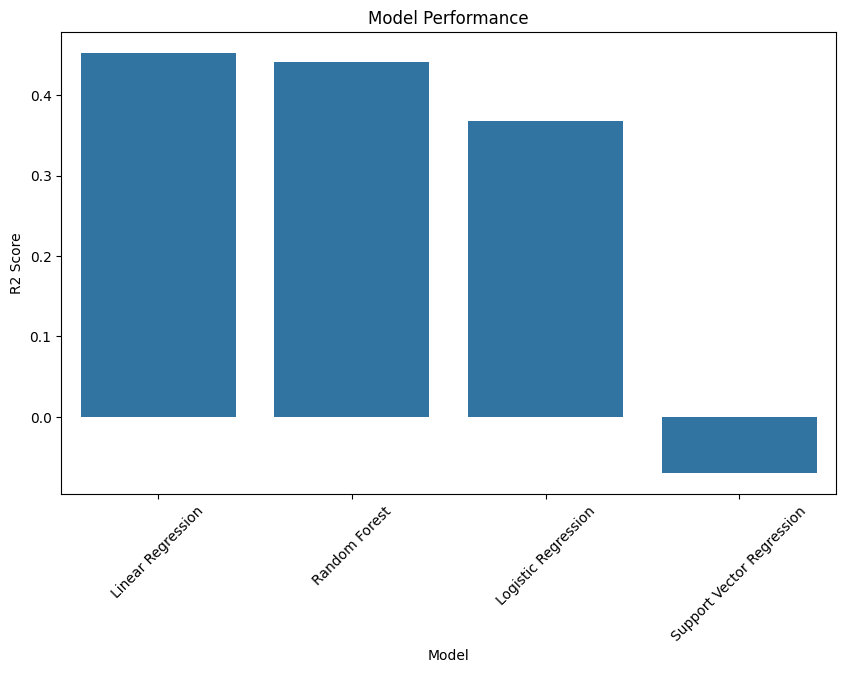

In [ ]:
#visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2 score', data = results_df)
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()